In [7]:
#DecisionTreeRegressor
#의사결정나무

In [8]:
#https://todayisbetterthanyesterday.tistory.com/38
#코드 따라해보기

In [11]:
# sklearn 모듈의 tree import
from sklearn import tree

# 간단한 데이터셋 생성
X = [[0,0], [1,1]]
Y = [0,1]

# 의사결정나무 적합 및 학습데이터 예측
clf = tree.DecisionTreeClassifier() #결정 트리 분류기 객체 생성
clf = clf.fit(X,Y) # X,Y를 사용하여 학습
clf.predict([[1,1]]) # [1,1]샘플에 대한 예측값을 출력

array([1])

In [21]:
# 라이브러리 impot & 실습 데이터 로드

# sklearn 모듈의 tree import
from sklearn import tree
from sklearn.datasets import load_iris
from os import system  # graphviz 라이브러리 설치를 위함

# graphviz 라이브러리 설치 // 아래 예제에서 오류나는 경우 anaconda prompt에서 설치 바람
system("pip install graphviz")

# graphviz 사용에 있어서 error 발생원이이 환경변수일 경우 환경변수 추가 필요
# 환경변수 추가 후 환경변수 설정 아래코드
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

# iris 실습데이터 로드
iris = load_iris()

In [13]:
# Decision Tree Classifier (의사결정분류나무)
# 기본적인 의사결정 나무 : Information Gain - Gini

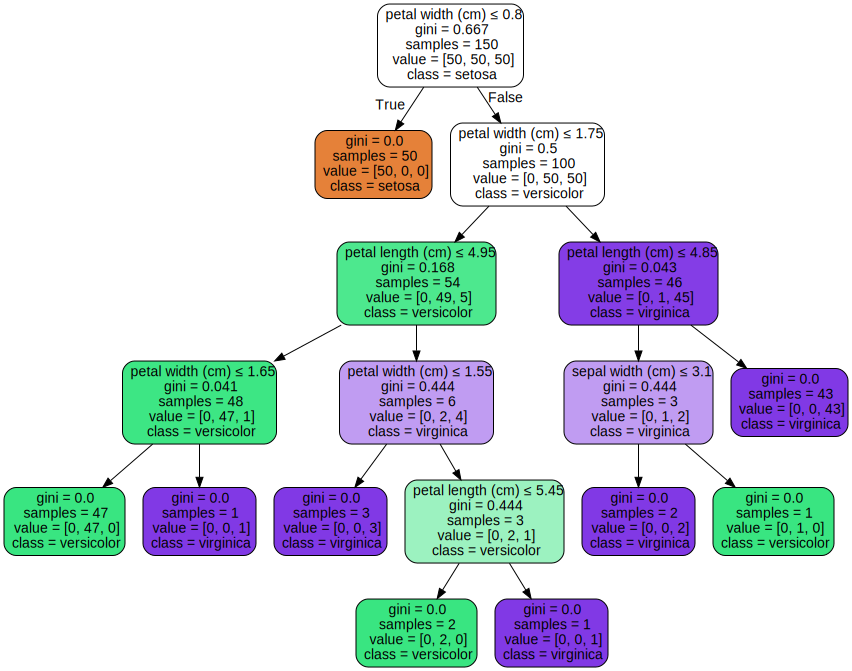

In [22]:
# 의사결정나무 분류
clf = tree.DecisionTreeClassifier()   #종속변수가 현재 범주형
#DecisionTreeClassifier: 분류에 사용되는 결정 트리 모델을 구축
clf = clf.fit(iris.data, iris.target) #feature, target
#분류기 객체에 학습 데이터를 적용하여 분류 모델을 만든다.

#시각화
import graphviz
dot_data = tree.export_graphviz(clf,            #d의사결정나무 모형 대입
                                out_file = None,  # file로 변환할 것인가?
                                feature_names = iris.feature_names, # feature 이름
                                class_names = iris.target_names, # tartget 이름
                                filled = True,                  # 그림에 색상을 넣을것인가?
                                rounded = True,                 # 반올림을 진행할 것인가?
                                special_characters = True)        #특수문자를 사용할 것인가?
graph = graphviz.Source(dot_data)
graph

In [23]:
#Information Gain - entropy 의사결정나무

In [24]:
#의사결정나무 분류
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")   # InforMation Gain - entropy
clf2 = clf2.fit(iris.data, iris.target)                     # feature, target

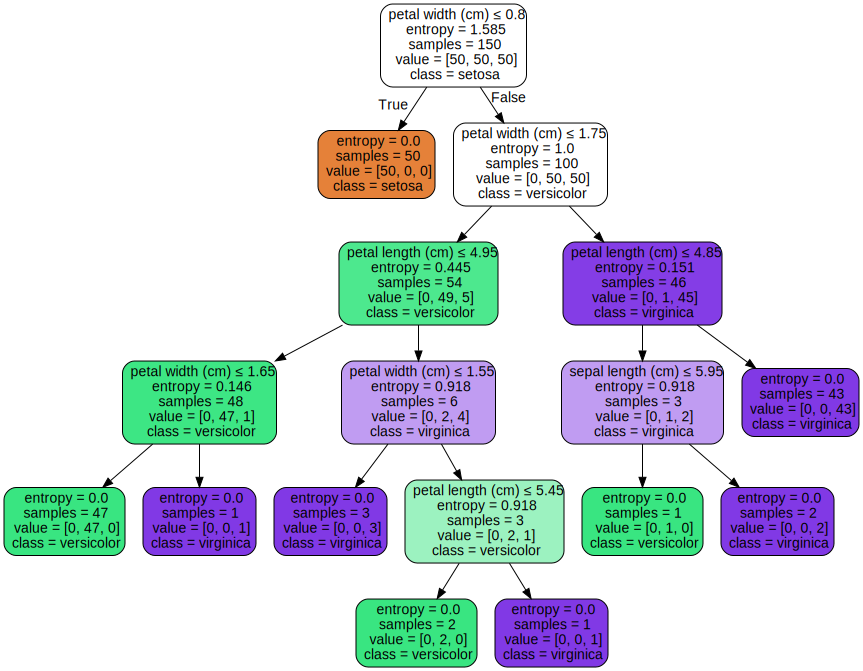

In [28]:
#시각화
dot_data2 = tree.export_graphviz(clf2,
                                 out_file = None,   #의사결정나무 모형 대입
                                 feature_names = iris.feature_names,    #file로 변환할 것인가?
                                 class_names = iris.target_names,   # feature 이름
                                 filled = True,    #그림에 색상을 넣을 것인가?
                                 rounded = True,    #반올림을 진행할 것인가?
                                 special_characters = True)   #특수문자를 사용할 것인가?
graph2 = graphviz.Source(dot_data2)
graph2

In [29]:
#pruning - 가지치기

In [31]:
# Pruning
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

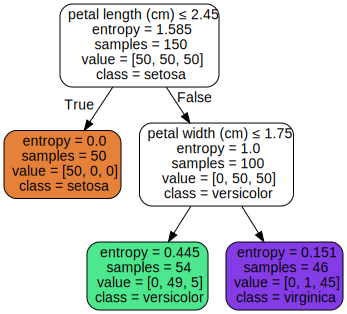

In [33]:
# 시각화
dot_data3 = tree.export_graphviz(clf3,    # 의사나무모형 대입
                                 out_file = None,   # file로 변환할 것인가?
                                 feature_names = iris.feature_names,    # feature 이름
                                 class_names = iris.target_names,    #target 이름
                                 filled = True,   # 그림에 색상을 넣을 것인가?
                                 rounded = True,    # 반올림을 진행할 것인가?
                                 special_characters = True)   # 특수문자를 사용할 것인가?
graph3 = graphviz.Source(dot_data3)
graph3

In [34]:
# Confusion matrix를 활용한 정확도 비교

In [39]:
from sklearn.metrics import confusion_matrix

# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [40]:

# 2번 의사결정나무 - entropy 활용
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [41]:
# 3번 의사결정나무 - 가지치기 작업
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [42]:
# Training Set / Test Set 구분

In [44]:
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,    #feature
                                                    iris.target,    #target
                                                    stratify = iris.target,   #층화추출법
                                                    random_state = 1)   #난수고정

# +챗GPT 설명 : 각각의 변수에는
# X_train: 학습용 feature 데이터,
# X_test: 테스트용 feature 데이터,
# y_train: 학습용 target 데이터,
# y_test 테스트용 target 데이터가 저장됩니다.

In [46]:
# train dataset
clf4 = tree.DecisionTreeClassifier(criterion = "entropy")
clf4.fit(X_train, y_train) #학습용 feature 데이터, 학습용 target 데이터

# test set predict confusion matrix
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

In [47]:
# Decision Regression Tree (의사결정회귀나무)

In [58]:
# 필요 라이브러리
import numpy as np    # 수치 계산에 필요한 라이브러리 제공
from sklearn.tree import DecisionTreeRegressor  # 회귀나무 함수
import matplotlib.pyplot as plt   # 데이터 시각화에 사용되는 라이브러리

# 실습용 데이터셋 만들기
rng = np.random.RandomState(1)      # 난수 생성기(RandomState)를 생성하여 seed 값을 1로 고정
X = np.sort(5 * rng.rand(80, 1), axis = 0)    # 80행 1열의 난수 행렬 x를 생성하고 이를 정렬
y = np.sin(X).ravel()      # sin함수의 예측을 목표로한다
y[::5] += 3 * (0.5 - rng.rand(16))    #이상치를 발생시킨다.

In [50]:
# X_test set 생성
X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]
# 0.0부터 5.0까지 0.01씩 증가하는 1차원 배열을 생성, 이를 2차원 배열로 변환

In [51]:
# Regresssion Tree 구축

In [53]:
# 깊이가 다른 두 Regression 나무 생성
regr1 = tree.DecisionTreeRegressor(max_depth = 2)
regr2 = tree.DecisionTreeRegressor(max_depth = 5)

# 두 가지 회귀나무 적합
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [55]:
# 예측
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [56]:
# 에측 결과물
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

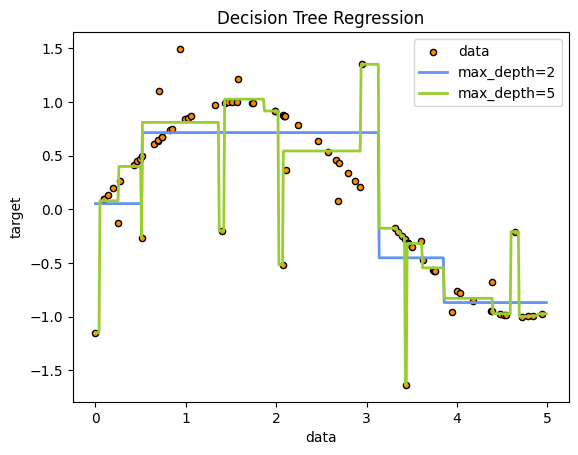

In [61]:
# depth가 다른 두 회귀나무 도식화
plt.figure()
plt.scatter(X,y, s=20, edgecolor = 'black',
            c = "darkorange", label = "data")
plt.plot(X_test,
         y_1,
         color = "cornflowerblue",
         label = "max_depth=2",
         linewidth = 2)
plt.plot(X_test,
         y_2,
         color = "yellowgreen",
         label = "max_depth=5",
         linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()